In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [5]:
TRAINING_DIR = (r'C:\Users\Utilisateur\Desktop\projet dog\test')


In [6]:
IMG_SIZE = 224
BATCH_SIZE = 64
CLASS_NUM = 120

# Training IDG
train_idg = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=0.1, 
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2)

train_gen = train_idg.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='categorical',
    subset='training'
)


test_idg = ImageDataGenerator(rescale=1./255)

test_gen = train_idg.flow_from_directory(
        TRAINING_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=True,
        class_mode='categorical',
        subset='validation'
)

Found 16508 images belonging to 120 classes.
Found 4072 images belonging to 120 classes.


Found 16508 images belonging to 120 classes.


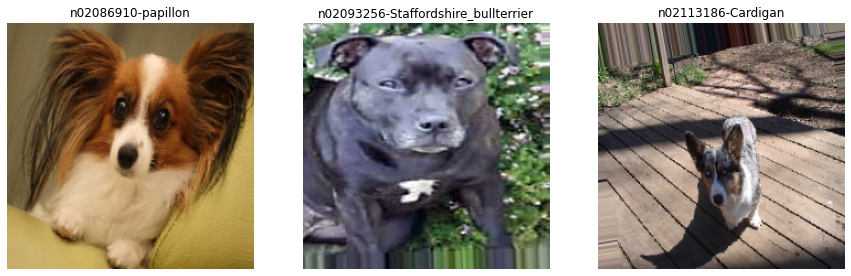

In [7]:
# Iterateur
aug_iter = train_idg.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    subset='training'
)

# afficher les images horizontales
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# obtenir les étiquettes des classes de flux à partir du répertoire
def getLabel(index):
    return (list(aug_iter.class_indices.keys())[list(aug_iter.class_indices.values()).index(index)])

# afficher 3 images
for i in range(3):
    
    obj = next(aug_iter)
    
    # nous obtenons l'index de chaque classe
    class_index = np.argmax(obj[1])
    
    # obtenir des images de générateur
    image = obj[0]

    # afficher 3 images
    ax[i].imshow(image.reshape(IMG_SIZE, IMG_SIZE, 3))
    ax[i].set_title(getLabel(class_index))
    ax[i].axis('off')

# CNN avec Transfer Learning

In [8]:

# === InceptionV3 CNN Model ===================
base_model = keras.applications.InceptionV3(
    weights = 'imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

# === Architecture ===================
x = base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.4)(x)
x = keras.layers.Dense(2048, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(CLASS_NUM, activation='softmax')(x)

# le modèle est attaché
model = keras.Model(base_model.input, outputs)
# === Arquitectura ===================

# geler les couches
for layer in base_model.layers:
    layer.trainable = False

# Compiler le model.
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()

87916544/87910968 [==============================] - 6s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_____________________________

In [9]:
history = model.fit(
    train_gen,
    steps_per_epoch=80,  
    epochs=10,
    verbose=1,
    validation_data=test_gen,
    validation_steps=50
)

Epoch 1/10
80/80 [==============================] - 495s 6s/step - loss: 2.9193 - accuracy: 0.4267 - val_loss: 3.8890 - val_accuracy: 0.5344
Epoch 2/10
80/80 [==============================] - 449s 6s/step - loss: 1.5681 - accuracy: 0.6477 - val_loss: 2.2483 - val_accuracy: 0.6416
Epoch 3/10
80/80 [==============================] - 440s 6s/step - loss: 1.3698 - accuracy: 0.6889 - val_loss: 2.0479 - val_accuracy: 0.6516
Epoch 4/10
80/80 [==============================] - 467s 6s/step - loss: 1.2295 - accuracy: 0.7054 - val_loss: 1.5775 - val_accuracy: 0.6881
Epoch 5/10
80/80 [==============================] - 444s 6s/step - loss: 1.1894 - accuracy: 0.7266 - val_loss: 1.4714 - val_accuracy: 0.6953
Epoch 6/10
80/80 [==============================] - 439s 6s/step - loss: 1.1783 - accuracy: 0.7202 - val_loss: 1.3702 - val_accuracy: 0.7053
Epoch 7/10
80/80 [==============================] - 521s 7s/step - loss: 1.1163 - accuracy: 0.7181 - val_loss: 1.4571 - val_accuracy: 0.7066
Epoch 8/10
80

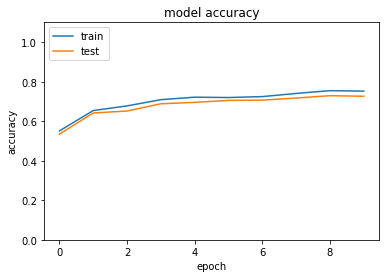

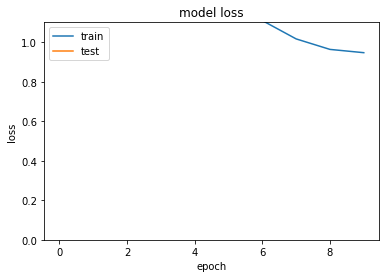

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1.1])
plt.show()

# Predictions

Found 4072 images belonging to 120 classes.


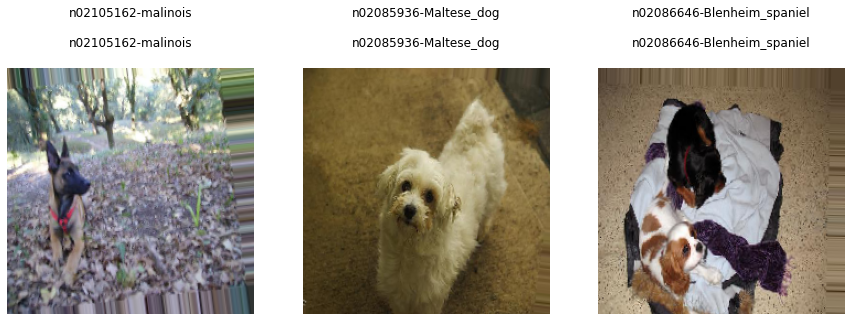

In [11]:
# iterator
aug_iter = train_idg.flow_from_directory(
        TRAINING_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=1,
        class_mode='categorical',
        subset='validation'
)

# mostrar imagenes horizontales
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# obtiene los labels de las clases de flow from directory
def getLabel(index):
    return (list(aug_iter.class_indices.keys())[list(aug_iter.class_indices.values()).index(index)])

# mostrar 3 imagenes
for i in range(3):

    obj = next(aug_iter)
    
    # obtenemos el index de cada clase
    class_index = np.argmax(obj[1])
    
    # obtener imagenes del generador
    image = obj[0]
    
    # valor real
    real = getLabel(class_index)
    # prediccion!
    pred = getLabel(np.argmax(model.predict([image])))
    
    # mostar 3 imagenes
    ax[i].imshow(image.reshape(IMG_SIZE, IMG_SIZE, 3))
    ax[i].set_title(real+"\n\n"+pred+"\n")
    ax[i].axis('off')